In [1]:
%autoreload 2 

In [2]:
%matplotlib inline

In [47]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
path = "../../data/"

In [26]:
import pandas as pd
# df = pd.read_hdf(path + "offset_stat_129.h5", "df")
offset_df = pd.read_hdf(path + "offset_stat_129.h5", "df1")

In [6]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr as PearsonR
import sys
import h5py
from matplotlib.mlab import bivariate_normal
import pandas as pd

In [7]:
sys.path.append("../")

In [8]:
import plot_gal_prop as pg
import extract_catalog as ec
import get_gal_centroids as get_gal

In [9]:
fhat_list = pickle.load(open(path + 'fhat_129_no_wwts.pkl'))

In [11]:
f = h5py.File("../../data/" + 
              "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [12]:
R200C = f["Group"]["Group_R_Crit200"][:129]

In [24]:
offset_df

Index([u'offset_no_wwts', u'offset_R200_no_wwts'], dtype='object')

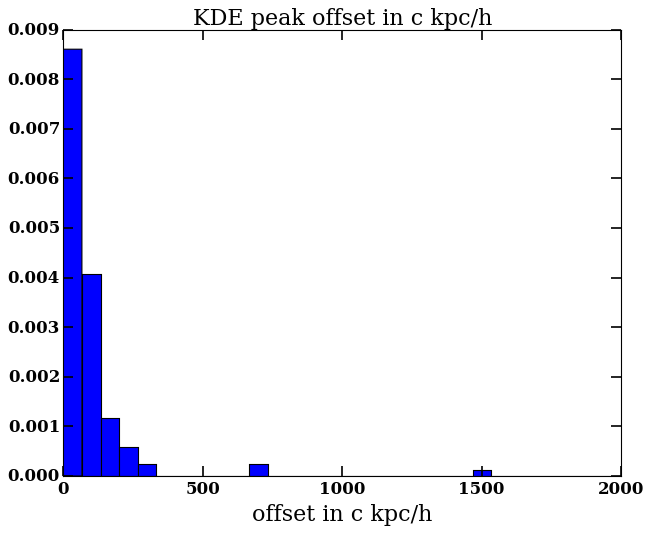

In [25]:
_, _, _ = plt.hist(np.array(offset_df["offset_no_wwts"]), 
                   normed=True, range=(0, 2e3),
                   bins=30)
plt.title('KDE peak offset in c kpc/h')
plt.xlabel('offset in c kpc/h')

In [28]:
richness = np.array([len(fhat["data_x"]) for fhat in fhat_list])

Mass Richness relationship

```
import seaborn as sns
sns.set_style("dark")
sns.kdeplot(richness, label='galaxies after minimal cuts')
plt.axvline(np.median(richness), color='r', linestyle='--', label="median")
plt.xlabel('Richness (# of cluster galaxies)')
plt.ylabel('PDF')
plt.title("median = {0:.0f}".format(np.median(richness)))
plt.legend(loc='best')
plt.savefig("../plots/richnesss.png", bbox_inches='tight')
```

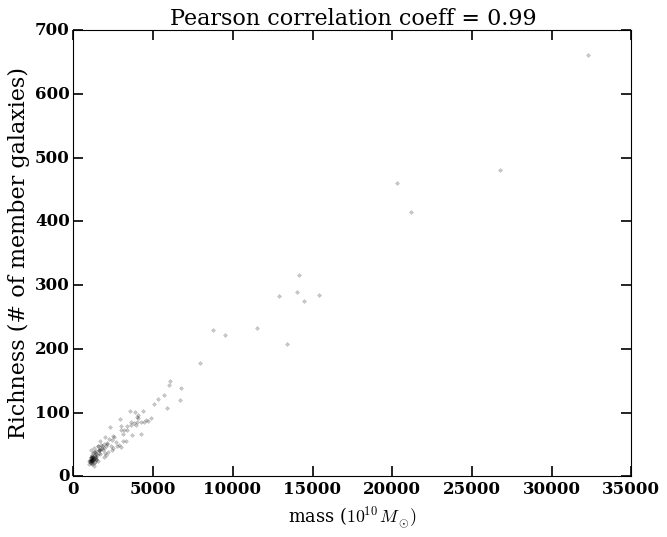

In [30]:
clstMass = np.array(f["Group"]["GroupMass"][:129])
pearsonr, pvalue = PearsonR(clstMass, richness)
plt.plot(clstMass,
         richness,'k.', alpha=0.2)
plt.ylabel("Richness (# of member galaxies)")
plt.xlabel(r"mass ($10^{10} M_{\odot})$", size=16)
plt.savefig("../plots/massrichnesss.png", bbox_inches='tight')
plt.title("Pearson correlation coeff = {0:.2g}".format(pearsonr))

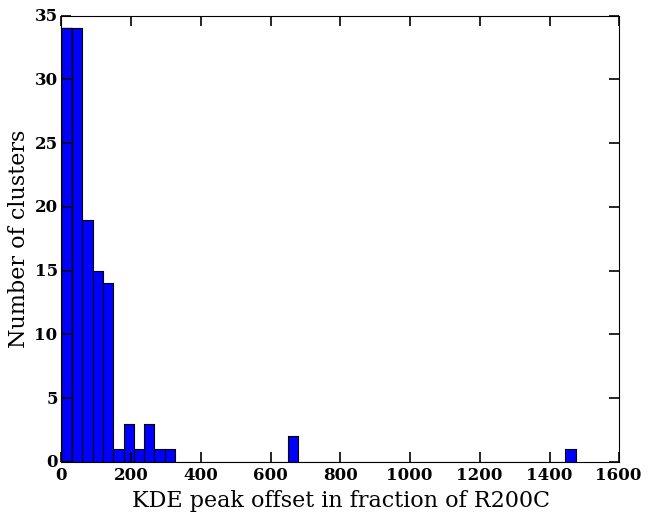

In [33]:
_, _, _ = plt.hist(np.array(offset_df["offset_no_wwts"]), bins=50)
plt.xlabel('KDE peak offset in fraction of R200C')
plt.ylabel('Number of clusters')
plt.savefig('../plots/KDE_peak_mostBound_offset_full_range.png', 
            bbox_inches='tight', dpi=150)

# There should be error bars on the y-axis

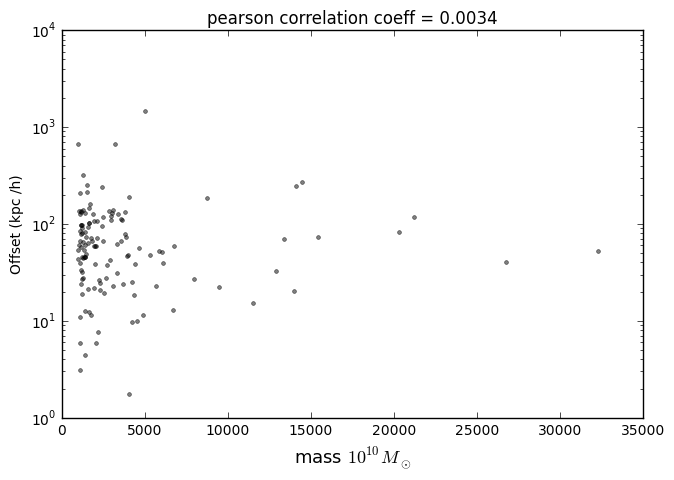

In [26]:
pearsonr, pvalue = PearsonR(clstMass, offset_list[:, 0])
plt.semilogy(clstMass, offset_list[:, 0], 'k.', alpha=0.5)
plt.ylabel("Offset (kpc /h)")
plt.xlabel(r"mass $10^{10} M_\odot$", size=13)
plt.title('pearson correlation coeff = {0:.3g}'.format(pearsonr))

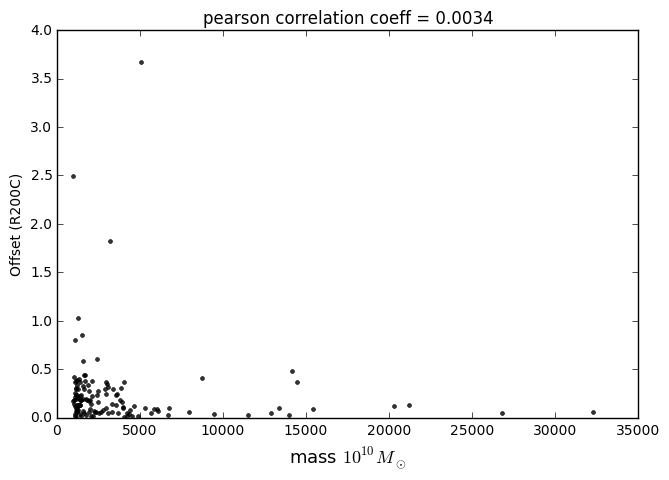

In [27]:
plt.plot(clstMass, offset_list[:, 1], 'k.', alpha=0.8)
plt.ylabel("Offset (R200C)")
plt.xlabel(r"mass $10^{10} M_\odot$", size=13)
plt.title('pearson correlation coeff = {0:.3g}'.format(pearsonr))

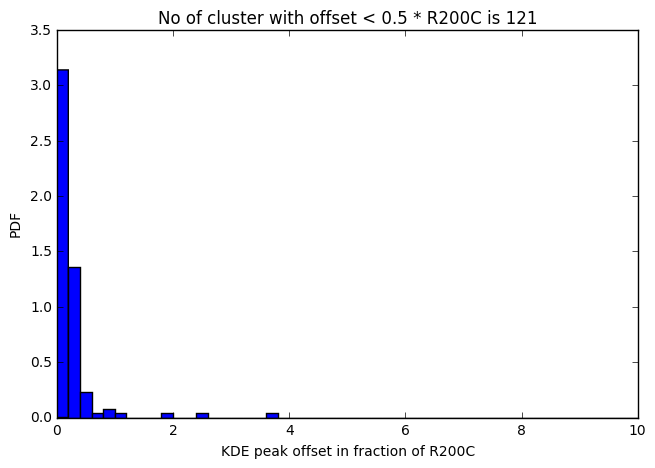

In [28]:
mask = offset_list[:, 1] < 0.5
_, _, _ = plt.hist(offset_list[:, 1], normed=True,
                   bins=50, range=(0, 10))
plt.title("No of cluster with offset < 0.5 * R200C is {0}".format(np.sum(mask)))
plt.xlabel('KDE peak offset in fraction of R200C')
plt.ylabel('PDF')
plt.savefig('../plots/KDE_peak_mostBound_offset_zoomed.png', 
            bbox_inches='tight', dpi=150)

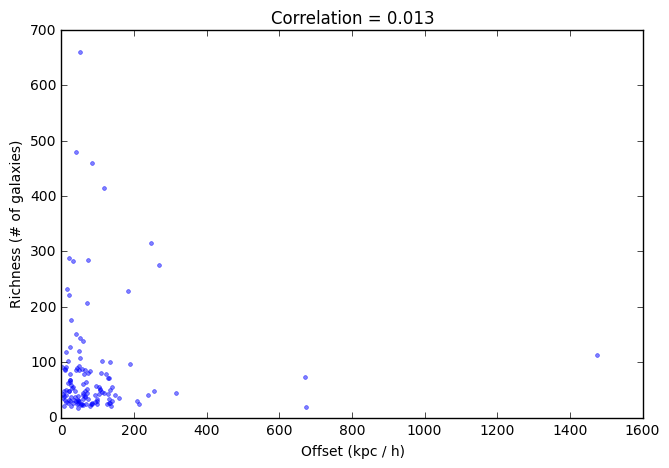

In [65]:
pearsonr, pvalue = PearsonR(richness, offset_list[:, 0])
plt.plot(offset_list[:, 0], richness, '.', alpha=0.5)
plt.xlabel("Offset (kpc / h)")
plt.ylabel("Richness (# of galaxies)")
plt.title("Correlation = {0:.3g}".format(pearsonr))

Look at the correlation of the relaxedness and the offset in R200C

In [29]:
pearsonr, pvalue = PearsonR(relaxedness_list, offset_list[:, 1])

In [30]:
print "pearson R coefficient is {0}".format(pearsonr)
print "p value is ... {0}".format(pvalue)

pearson R coefficient is 0.40857420762
p value is ... 1.53338268523e-06


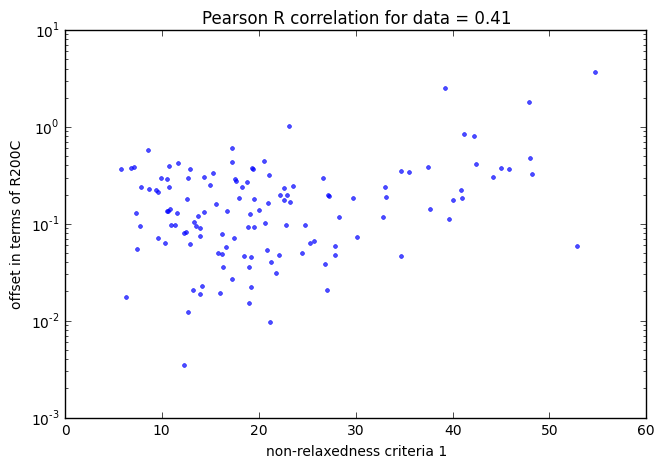

In [31]:
#plt.semilogy(relaxedness_list, offset_list[:, 0], 'r.', alpha=0.7)
plt.semilogy(relaxedness_list, offset_list[:, 1], 'b.', alpha=0.7)
plt.xlabel("non-relaxedness criteria 1")
plt.ylabel("offset in terms of R200C")
plt.title("Pearson R correlation for data " + 
          "= {0:.2f}".format(pearsonr))
plt.savefig("../plots/relaxednessVSOffsetInR200C.png", 
            bbox_inches="tight", dpi=200)

not very correlated ... 

# Look at the KDE maps from ks_KDE.r

In [35]:
fhat_dict = fhat_list

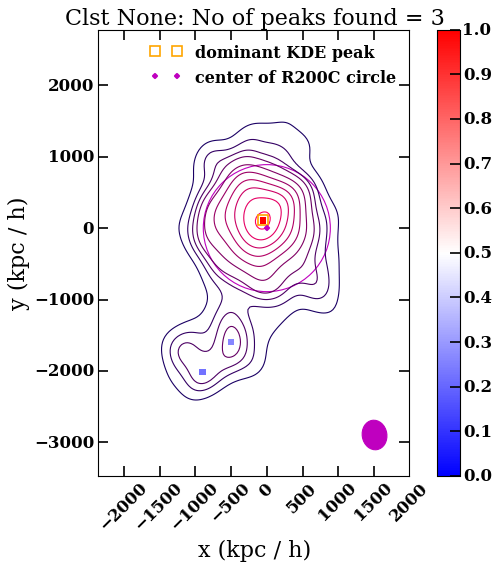

In [102]:
pg.plot_KDE_peaks(fhat_dict[0], allPeaks=True, 
                  R200C=R200C[0], showData=True,)

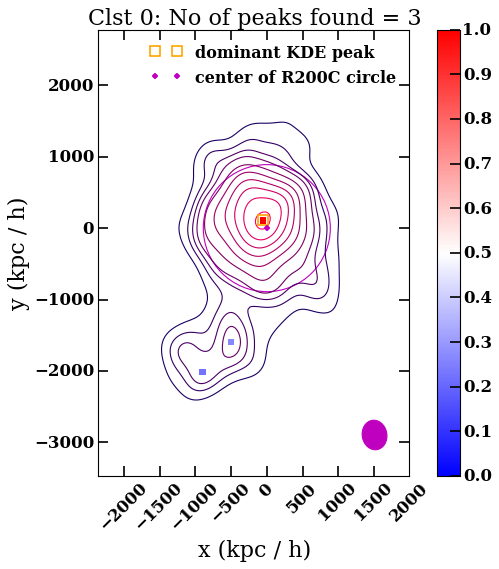

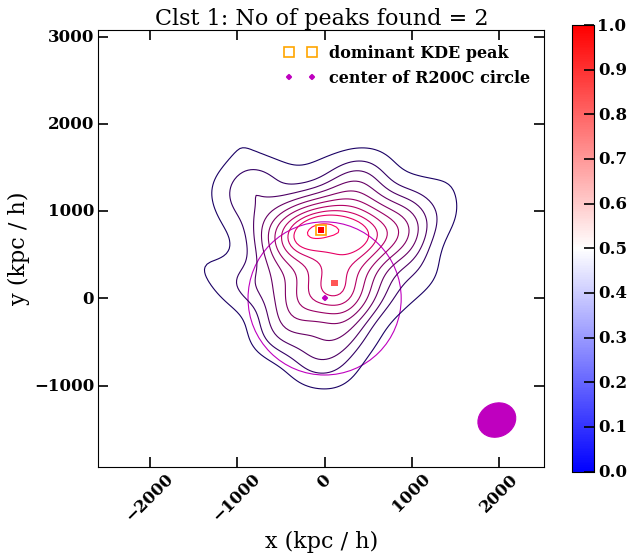

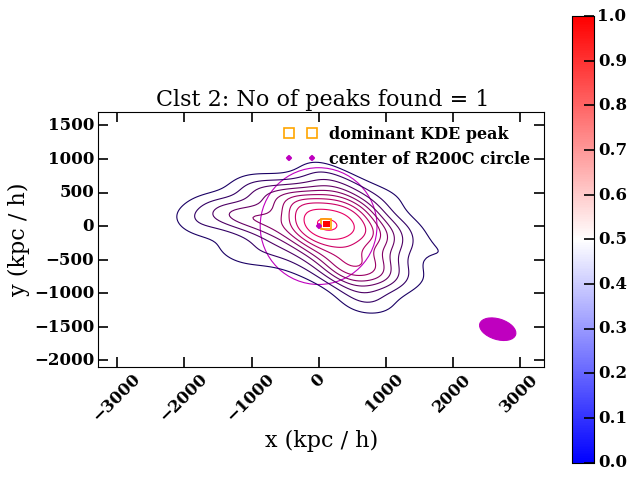

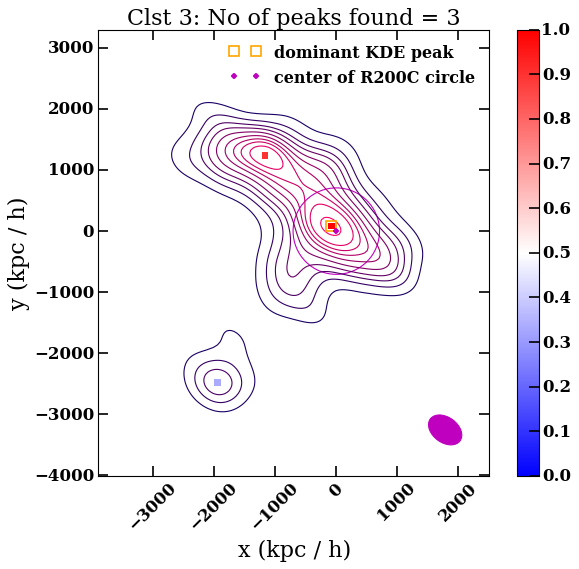

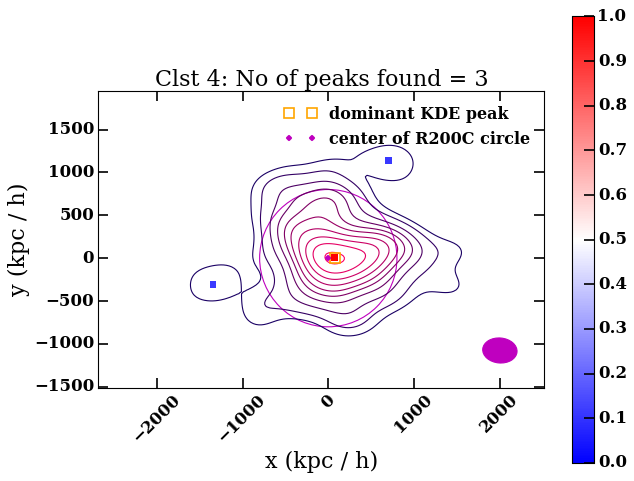

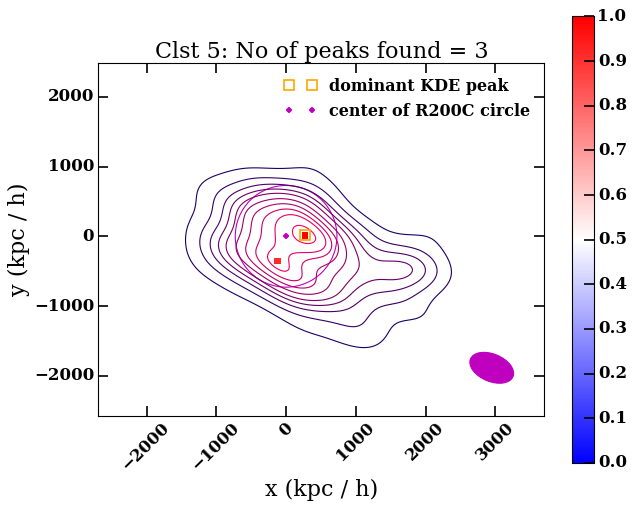

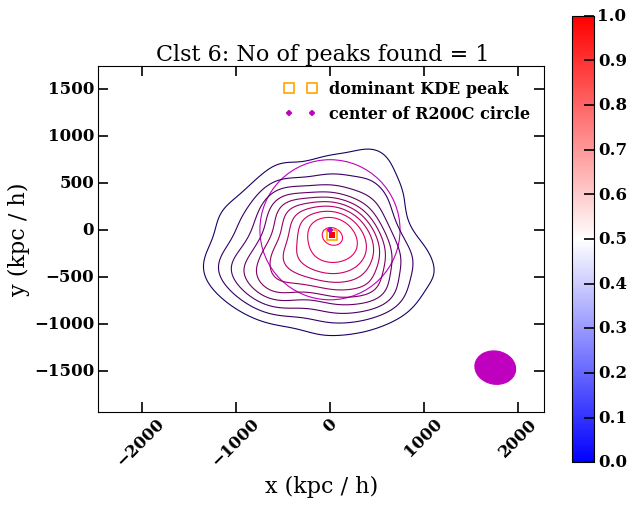

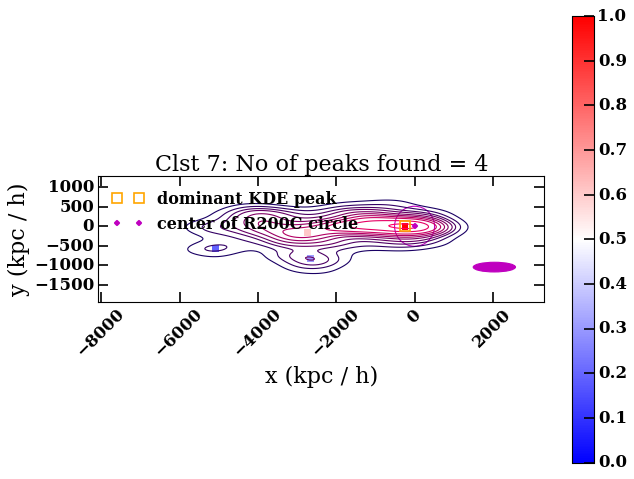

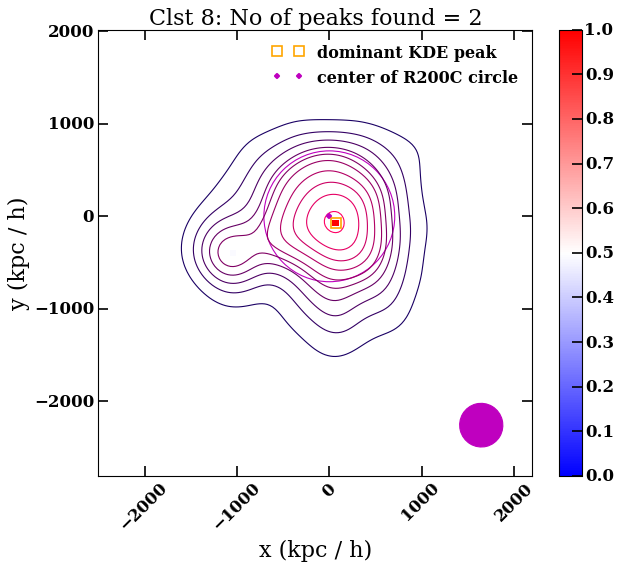

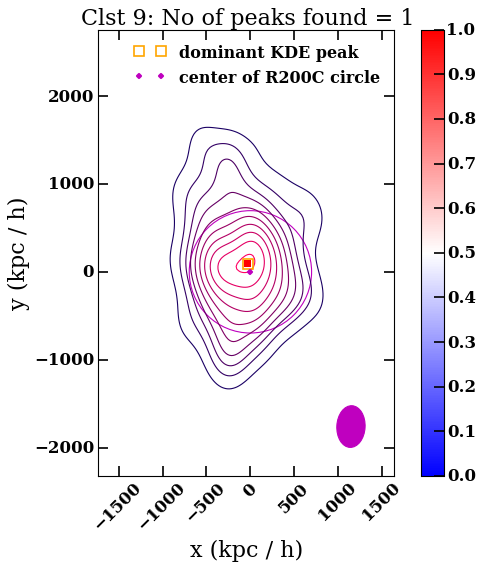

In [103]:
for i in range(10):  
    pg.plot_KDE_peaks(fhat_dict[i], allPeaks=True, 
                      R200C=R200C[i], showData=True,
                      clstNo=i)
    plt.close()

```
for i in range(10):  
    pg.plot_KDE_peaks(fhat_dict[i], allPeaks=True, 
                      showData=True, clstNo=i, R200C=R200C[i], 
                      save=False, showDomPeak=False, showContour=False,
                      plotDataPoints=True)
   
    plt.close()
```

## Examine super outlier i.e. offset > 2 * R200C

In [80]:
offset_df.columns

Index([u'offset_no_wwts', u'offset_R200_no_wwts'], dtype='object')

In [82]:
super_outlier_mask = offset_df['offset_R200_no_wwts'] > 2.0

In [97]:
outliers = [i for i in range(len(super_outlier_mask)) if super_outlier_mask[i]]

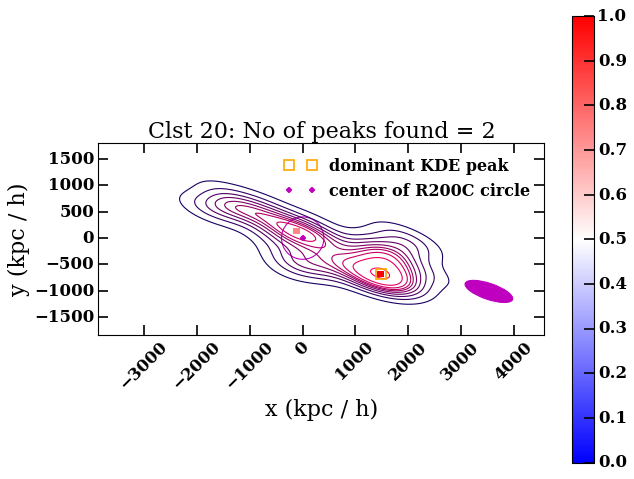

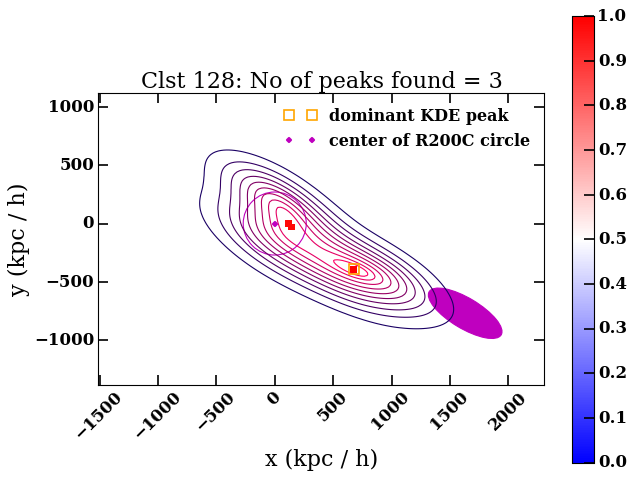

In [99]:
for i in outliers:
    pg.plot_KDE_peaks(fhat_dict[i], allPeaks=True, 
                  R200C=R200C[i], showData=True,
                  clstNo=i)

```
for i in np.arange(0, len(super_outlier_mask), 1)[super_outlier_mask]:
    pg.plot_KDE_peaks(fhat_dict[i], allPeaks=True, 
                      showData=True, clstNo=i,  # R200C=R200C[i], 
                      save=False, showDomPeak=True, showContour=False,
                      plotDataPoints=True, R200C=R200C[i])
    
    plt.close()
```

In [50]:
len(fhat_dict[128]["data_x"])

19

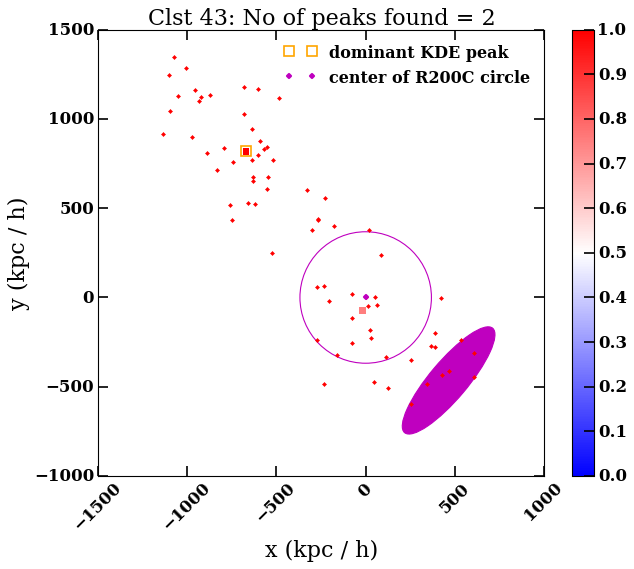

In [104]:
pg.plot_KDE_peaks(fhat_dict[43], allPeaks=True, 
                  showData=True, clstNo=43,  # R200C=R200C[i], 
                  save=False, showDomPeak=True, showContour=False,
                  plotDataPoints=True, R200C=R200C[43])

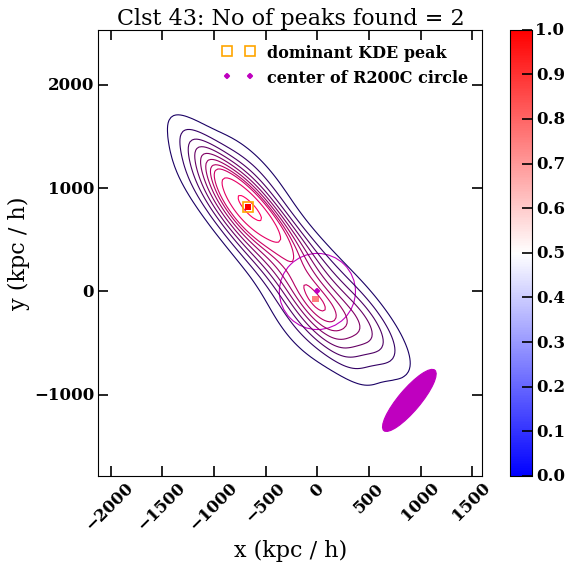

In [101]:
pg.plot_KDE_peaks(fhat_dict[43], allPeaks=True, 
                  R200C=R200C[43], showData=True,
                  clstNo=43)